In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/CunyLaguardiaDataAnalytics/datasets/master/Salaries.csv')

In [3]:
df.head(10)

,Unnamed: 0,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,1,Prof,B,19,18,Male,139750
1,2,Prof,B,20,16,Male,173200
2,3,AsstProf,B,4,3,Male,79750
3,4,Prof,B,45,39,Male,115000
4,5,Prof,B,40,41,Male,141500
5,6,AssocProf,B,6,6,Male,97000
6,7,Prof,B,30,23,Male,175000
7,8,Prof,B,45,45,Male,147765
8,9,Prof,B,21,20,Male,119250
9,10,Prof,B,18,18,Female,129000


In [4]:
df.tail(10)

,Unnamed: 0,rank,discipline,yrs.since.phd,yrs.service,sex,salary
387,388,Prof,A,29,15,Male,109305
388,389,Prof,A,38,36,Male,119450
389,390,Prof,A,33,18,Male,186023
390,391,Prof,A,40,19,Male,166605
391,392,Prof,A,30,19,Male,151292
392,393,Prof,A,33,30,Male,103106
393,394,Prof,A,31,19,Male,150564
394,395,Prof,A,42,25,Male,101738
395,396,Prof,A,25,15,Male,95329
396,397,AsstProf,A,8,4,Male,81035


DATA EXPLORATION

In [5]:
df['salary'].mean()

113706.45843828715

In [6]:
df['salary'].median()

107300.0

In [7]:
df['salary'].mode()

0    92000
Name: salary, dtype: int64

df.groupby(['Cylinder'])['Weight'].count().sort_values(ascending=False).plot(kind='bar')

In [8]:
df.groupby(['rank'])['salary'].count().sort_values(ascending=False)

rank
Prof         266
AsstProf      67
AssocProf     64
Name: salary, dtype: int64

<Axes: xlabel='rank'>

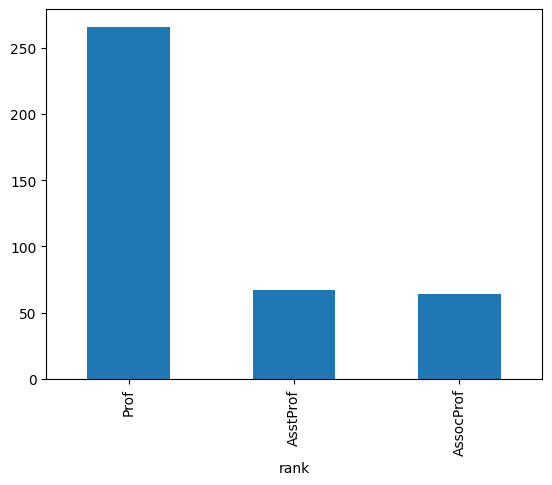

In [9]:
df.groupby(['rank'])['salary'].count().sort_values(ascending=False).plot(kind='bar')

In [10]:
df.groupby(['sex'])['salary'].count().sort_values(ascending=False)

sex
Male      358
Female     39
Name: salary, dtype: int64

<Axes: xlabel='sex'>

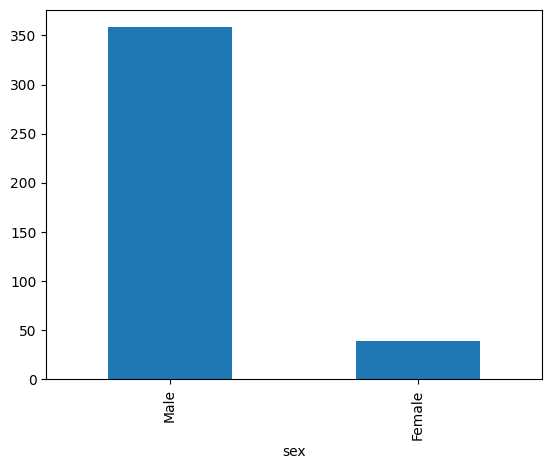

In [11]:
df.groupby(['sex'])['salary'].count().sort_values(ascending=False).plot(kind='bar')

DATA WRANGLING

In [12]:
df.head(5)

,Unnamed: 0,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,1,Prof,B,19,18,Male,139750
1,2,Prof,B,20,16,Male,173200
2,3,AsstProf,B,4,3,Male,79750
3,4,Prof,B,45,39,Male,115000
4,5,Prof,B,40,41,Male,141500


RENAMING

In [13]:
df.rename(columns={'Unnamed: 0': 'ID', 'rank': 'Rank', 'discipline': 'Disp', 'yrs.since.phd': 'PHD_yrs', 'yrs.service': 'SRV_yrs', 'sex': 'Gender', 'salary': 'Salary'}, inplace=True)

In [14]:
df.head(5)

,ID,Rank,Disp,PHD_yrs,SRV_yrs,Gender,Salary
0,1,Prof,B,19,18,Male,139750
1,2,Prof,B,20,16,Male,173200
2,3,AsstProf,B,4,3,Male,79750
3,4,Prof,B,45,39,Male,115000
4,5,Prof,B,40,41,Male,141500


SUBSETTING

In [15]:
df[df['Disp'].str.contains('A')]
Disp_A = df[df['Disp'].str.contains('A')]
Disp_A

,ID,Rank,Disp,PHD_yrs,SRV_yrs,Gender,Salary
17,18,Prof,A,38,34,Male,103450
18,19,Prof,A,37,23,Male,124750
19,20,Prof,A,39,36,Female,137000
20,21,Prof,A,31,26,Male,89565
21,22,Prof,A,36,31,Male,102580
...,...,...,...,...,...,...,...
392,393,Prof,A,33,30,Male,103106
393,394,Prof,A,31,19,Male,150564
394,395,Prof,A,42,25,Male,101738
395,396,Prof,A,25,15,Male,95329


In [16]:
df[df['Disp'].str.contains('A')]
Disp_A = df[df['Disp'].str.contains('A')]
Disp_A

,ID,Rank,Disp,PHD_yrs,SRV_yrs,Gender,Salary
17,18,Prof,A,38,34,Male,103450
18,19,Prof,A,37,23,Male,124750
19,20,Prof,A,39,36,Female,137000
20,21,Prof,A,31,26,Male,89565
21,22,Prof,A,36,31,Male,102580
...,...,...,...,...,...,...,...
392,393,Prof,A,33,30,Male,103106
393,394,Prof,A,31,19,Male,150564
394,395,Prof,A,42,25,Male,101738
395,396,Prof,A,25,15,Male,95329


cannot be due to alpha numeric


In [17]:
df.groupby(['Gender'])['Rank'].count().sort_values(ascending=False)

Gender
Male      358
Female     39
Name: Rank, dtype: int64

<Axes: xlabel='Gender'>

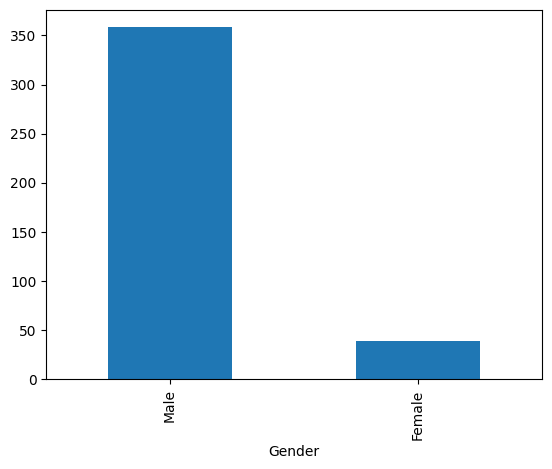

In [18]:
df.groupby(['Gender'])['Rank'].count().sort_values(ascending=False).plot(kind='bar')

HANDLING MISSING DATA

In [19]:
df.isnull

<bound method DataFrame.isnull of       ID      Rank Disp  PHD_yrs  SRV_yrs Gender  Salary
0      1      Prof    B       19       18   Male  139750
1      2      Prof    B       20       16   Male  173200
2      3  AsstProf    B        4        3   Male   79750
3      4      Prof    B       45       39   Male  115000
4      5      Prof    B       40       41   Male  141500
..   ...       ...  ...      ...      ...    ...     ...
392  393      Prof    A       33       30   Male  103106
393  394      Prof    A       31       19   Male  150564
394  395      Prof    A       42       25   Male  101738
395  396      Prof    A       25       15   Male   95329
396  397  AsstProf    A        8        4   Male   81035

[397 rows x 7 columns]>

In [20]:
df.isnull().sum()

ID         0
Rank       0
Disp       0
PHD_yrs    0
SRV_yrs    0
Gender     0
Salary     0
dtype: int64

In [21]:
df.dropna()

,ID,Rank,Disp,PHD_yrs,SRV_yrs,Gender,Salary
0,1,Prof,B,19,18,Male,139750
1,2,Prof,B,20,16,Male,173200
2,3,AsstProf,B,4,3,Male,79750
3,4,Prof,B,45,39,Male,115000
4,5,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...,...
392,393,Prof,A,33,30,Male,103106
393,394,Prof,A,31,19,Male,150564
394,395,Prof,A,42,25,Male,101738
395,396,Prof,A,25,15,Male,95329


EXTRA

CREATING SUBSETS

In [22]:
df[df['Disp'].str.contains('A')]
Disp_A = df[df['Disp'].str.contains('A')]
Disp_A

,ID,Rank,Disp,PHD_yrs,SRV_yrs,Gender,Salary
17,18,Prof,A,38,34,Male,103450
18,19,Prof,A,37,23,Male,124750
19,20,Prof,A,39,36,Female,137000
20,21,Prof,A,31,26,Male,89565
21,22,Prof,A,36,31,Male,102580
...,...,...,...,...,...,...,...
392,393,Prof,A,33,30,Male,103106
393,394,Prof,A,31,19,Male,150564
394,395,Prof,A,42,25,Male,101738
395,396,Prof,A,25,15,Male,95329


In [23]:
df[df['Disp'].str.contains('A')]
Disp_A = df[df['Disp'].str.contains('A')]
Disp_A

,ID,Rank,Disp,PHD_yrs,SRV_yrs,Gender,Salary
17,18,Prof,A,38,34,Male,103450
18,19,Prof,A,37,23,Male,124750
19,20,Prof,A,39,36,Female,137000
20,21,Prof,A,31,26,Male,89565
21,22,Prof,A,36,31,Male,102580
...,...,...,...,...,...,...,...
392,393,Prof,A,33,30,Male,103106
393,394,Prof,A,31,19,Male,150564
394,395,Prof,A,42,25,Male,101738
395,396,Prof,A,25,15,Male,95329


EXACT STRING

In [24]:
df[df['Rank'] == 'Prof']
Prof_ = df[df['Rank'] == 'Prof']
Prof_

,ID,Rank,Disp,PHD_yrs,SRV_yrs,Gender,Salary
0,1,Prof,B,19,18,Male,139750
1,2,Prof,B,20,16,Male,173200
3,4,Prof,B,45,39,Male,115000
4,5,Prof,B,40,41,Male,141500
6,7,Prof,B,30,23,Male,175000
...,...,...,...,...,...,...,...
391,392,Prof,A,30,19,Male,151292
392,393,Prof,A,33,30,Male,103106
393,394,Prof,A,31,19,Male,150564
394,395,Prof,A,42,25,Male,101738


<Axes: >

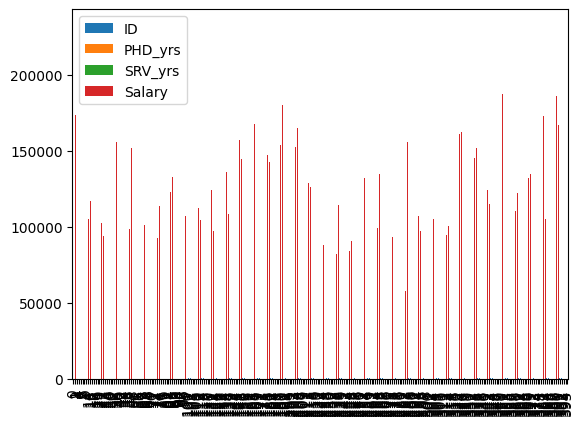

In [25]:
Prof_.plot(kind='bar')

FUZZY

In [26]:
df[df['Rank'].str.contains('Asst')]
Prof_Asst = df[df['Rank'].str.contains('Asst')]
Prof_Asst

,ID,Rank,Disp,PHD_yrs,SRV_yrs,Gender,Salary
2,3,AsstProf,B,4,3,Male,79750
11,12,AsstProf,B,7,2,Male,79800
12,13,AsstProf,B,1,1,Male,77700
13,14,AsstProf,B,2,0,Male,78000
27,28,AsstProf,B,5,3,Male,82379
...,...,...,...,...,...,...,...
359,360,AsstProf,A,11,4,Male,78785
376,377,AsstProf,A,4,1,Male,74856
377,378,AsstProf,A,6,3,Male,77081
380,381,AsstProf,A,8,3,Male,75996


In [27]:
#is_Prof_Asst = df[df['Salary'] == "AsstProf"]
#Prof_Asst_Sal = df[is_Prof_Asst]
#Prof_Asst_Sal['Rank'].value_counts()

In [28]:
df.groupby(['Rank'])['Salary'].count()
df.groupby(['Rank'])['Salary'].count().sort_values(ascending=False)
Rank_Salary = df.groupby(['Rank'])['Salary'].count().sort_values(ascending=False)

In [29]:
Rank_Salary

Rank
Prof         266
AsstProf      67
AssocProf     64
Name: Salary, dtype: int64

<Axes: xlabel='Rank'>

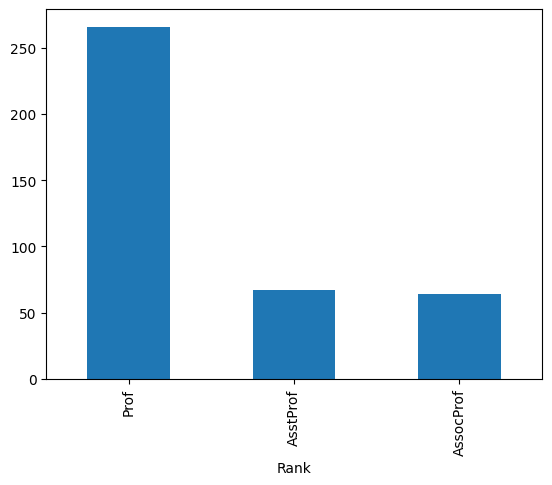

In [30]:
Rank_Salary.plot(kind='bar')

In [31]:
df[df['Rank'] == 'Prof']
Prof_.mean()

<ipython-input-31-829dfb96749a>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  Prof_.mean()


ID            210.977444
PHD_yrs        28.300752
SRV_yrs        22.815789
Salary     126772.109023
dtype: float64

In [32]:
df[df['Salary']>=10000]

,ID,Rank,Disp,PHD_yrs,SRV_yrs,Gender,Salary
0,1,Prof,B,19,18,Male,139750
1,2,Prof,B,20,16,Male,173200
2,3,AsstProf,B,4,3,Male,79750
3,4,Prof,B,45,39,Male,115000
4,5,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...,...
392,393,Prof,A,33,30,Male,103106
393,394,Prof,A,31,19,Male,150564
394,395,Prof,A,42,25,Male,101738
395,396,Prof,A,25,15,Male,95329


In [33]:
df[['Rank','Gender']]
Rank_by_Gender = df[['Rank','Gender']]
Rank_by_Gender.sort()

AttributeError: ignored

In [36]:
df.groupby(['Rank'])['Salary'].median()

Rank
AssocProf     95626.5
AsstProf      79800.0
Prof         123321.5
Name: Salary, dtype: float64

In [37]:
df.groupby(['Gender'])['Salary'].median()

Gender
Female    103750.0
Male      108043.0
Name: Salary, dtype: float64

<Axes: ylabel='Salary'>

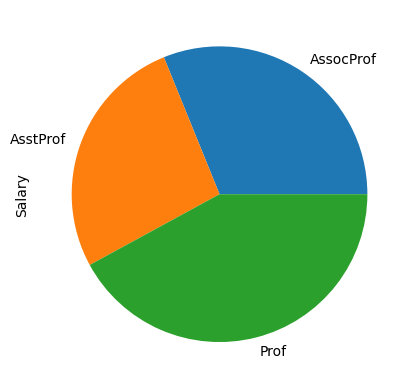

In [38]:
df.groupby(['Rank'])['Salary'].mean().plot(kind='pie')

<Axes: xlabel='Rank,Gender'>

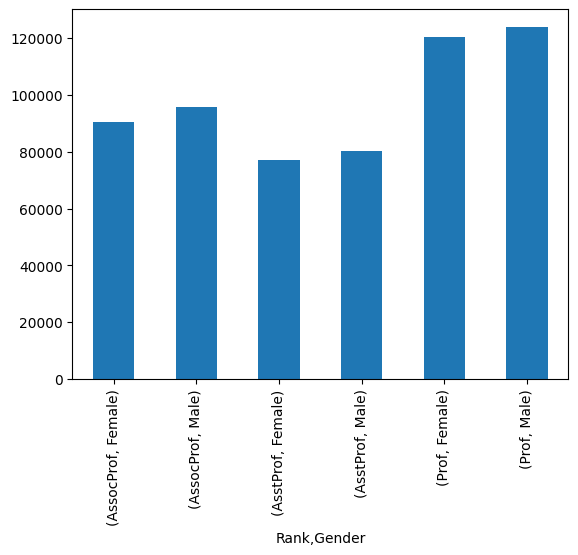

In [44]:
df.groupby(['Rank','Gender'])['Salary'].median().plot.bar()

CONCLUSIONS
The dataset contains 397 rows and 7columns. It represents data regarding the professors of an educative institution. the analysis allows us to make the follwing conclusions:

- For the entire dataset, the median salary is 107,300.00. The minikum salary is 57,800.00 and the maximum is 231,545.00.

- When group the data by rank/title, the median salary for each rank are the following:

PROF - 123,321.50
Asst Prof - 95,625.50
Asso Prof - 0000000

-When we group the data by gender, the median salary are as follows:

Male Prof 108,043.00
Female Prof 103,750.00

Finally, the data shows that the PROFS represent 67% of the faculty, the ASST PROF is 16.88% and the ASSO PROF 16.12%


In [ ]:
df.groupby(['Rank'])['Gender'].count().sort_values(ascending=False)
df.groupby(['Rank'])['Gender'].count().sort_values(ascending=False).plot(kind='bar')

In [ ]:
df.groupby(['SRV_yrs'])['Salary'].count()

is_water = df['Complaint Type'] == "Water System"

water_complaints = df[is_water]

water_complaints['Borough'].value_counts()